In [33]:
1
%load_ext autoreload
%autoreload 2

import pandas as pd
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
import sklearn.metrics
import numpy as np
import seaborn as sns
import tensorflow as tf
import tensorflow.keras as keras

import backend.utils as utils
from io import StringIO


%reload_ext autoreload



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
def show_correlation_graph(data, title=None,
                           cmap=None, linewidths=0, figsize=(9, 6), annot=True):
    if cmap is None:
        cmap = sns.diverging_palette(10, 120, as_cmap=True)
    data = data.dropna()
    corr = data.corr()
    for column_name in corr.columns:
        corr[column_name] = corr[column_name].abs()
    _, ax = plt.subplots(figsize=figsize)
    if title:
        ax.set_title(title)

    _ = sns.heatmap(corr, annot=annot, fmt="2.2f",
                linewidths=linewidths, ax=ax, cmap=cmap)


In [34]:
data = await utils.get_latest_trace('junk')
df = pd.read_csv(StringIO(data))

In [35]:
df

,time,v1,v2
0,2021-05-12 20:22:26,87.423279,46.765266
1,2021-05-12 20:22:26,10.505411,4.791264
2,2021-05-12 20:22:26,48.380306,55.195152
3,2021-05-12 20:22:26,29.898027,51.128265
4,2021-05-12 20:22:26,53.701126,71.306778
...,...,...,...
1995,2021-05-12 20:22:28,29.091961,74.133369
1996,2021-05-12 20:22:28,91.573021,71.421280
1997,2021-05-12 20:22:28,24.832067,78.311386
1998,2021-05-12 20:22:28,1.142907,2.370064


<AxesSubplot:xlabel='time'>

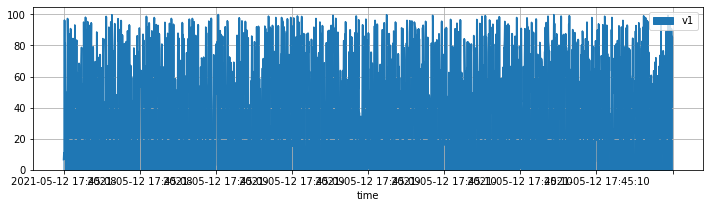

In [18]:
df.plot.area(x="time", y="v1", rot=0, grid=True, figsize=(12,3))

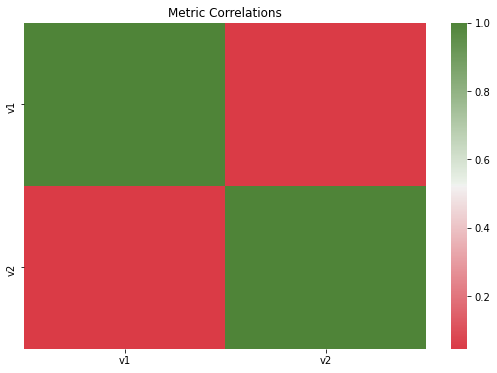

In [24]:
show_correlation_graph(df, annot=False, title="Metric Correlations")

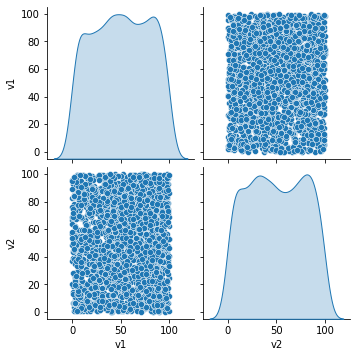

In [32]:
sns.pairplot(df, diag_kind='kde')